<a href="https://colab.research.google.com/github/giulicrenna/data_science/blob/main/Classification%20of%20cardiopulmonary%20diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# PRE
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as sm
import os
from scipy.stats import ttest_ind, kstest
from sklearn.metrics import r2_score
from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')
sns.set_theme(style="darkgrid")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
set_datos_original = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/problemas_cardiopulmonares.csv", encoding='ISO-8859-1', delimiter=';')
#set_datos_original.dtypes

# **INTRODUCCIÓN**

---

**Abstracto:** Es evidente que las enfermedades relacionadas al corazón y a los pulmones han sido, durante siglos, una de las causas de mortalidad más grandes del mundo. Por eso mismo es fundamental una detección temprana de estas enfermedades, para así lograr un temprano tratamiento de las mismas  y así poder prevenir complicaciones y mejorar la calidad de vida de los pacientes.
En ese sentido se han desarrollado a lo largo de las últimas décadas, diferentes métodos y tecnologías para la detección temprana de estas enfermedades, utilizando los siguientes parámetros de salud del paciente:
* Pruebas de función pulmonar.
* Niveles de diabetes.
* Niveles de colesterol.
* Condición de consumo del paciente.
* Pruebas de función pulmonar.
* Niveles de diabetes.
* Enfermedades preexistentes.

**Contexto Social:** Desde hace siglos que los problemas cardio-pulmonares azotan a sectores sociales puntuales. Recién en los tiempos mas actuales es que se ha podido hacer un avance acelerado en la detección temprana y tratamiento de estos problemas, previniendo así millones de muertes. Un ejemplo de esto es el bypass electrónico.

**Problema Social:** Nuestra tarea será procesar, limpiar y hacer un posterior análisis de los datos, desarrollando nuestros propios modeloos de machine learnig, los cuales nos ayudarán a entender mejor la problemática que estamos estudiando.

**Contexto analítico:** Una importante organización de salud nos proporcionará un archivo CSV que contiene todos los datos necesarios para poder realizar nuestro trabajo.
El dataset contiene las siguentes columnas:
- sexo
- edad
- dolor_de_pecho
- dificultad_para_respirar
- fatiga
- sistolica
- diastolica
- frecuencia_cardiaca_bpm
- sonidos_pulmonares
- niveles_de_colesterol
- colesterol_ldl
- colesterol_hdl
- diabetes
- fibrilacion_auricular
- prolapso_valvula_mitral
- fiebre_reumatica
- estenosis_mitral
- estenosis_aortica
- estenosis_tricuspidea
- estenosis_pulmonar
- miocardiopatia_dilatada
- miocardiopatía_hipertrófica
- miocardiopatía_restrictiva
- miocardiopatía_arritmogénica_del_ventrículo_derecho
- usa_drogas
- fiebre
- escalofrios
- dolores_en_articulaciones
- alcoholismo
- hipertension
- desmayo
- mareo
- fuma
- colesterol_alto
- ecocardiograma
- obesidad
- murmullo
- rayos_x_pecho
- enfermedades_previas
- funciones_pulmonares
- espirometria
- diagnostico
- medicaciones
Tareas a realizar:
- Extraer los datos y posteriormente purgarlos.
- Leer y transformar los datos, y hacer visualizaciones.
- Hacer un análisis exploratorio. (EDA)
- Realizar modeloos de machine learning.
- Realizar conclusiones.

Hay ciertas preguntas que nos gustaría responder previamente, las cuales nos ayudarán a abordar el análisis de los datos con mayor precisión y facilidad.

- ¿Cual es la cantidad de días entre el diágnostico de covid y el fallecimiento de la persona?
- ¿Existe alguna posibilidad de realizar una regresión lineal?

Primero nos gustaría ver un muestreo de los datos.

# Exploratory Data Analysis

El siguiente gráfico nos muestra cual es a frecuencia cardíaca en relación a la edad.

Text(0, 0.5, 'Frecuencia cardíaca (BPM)')

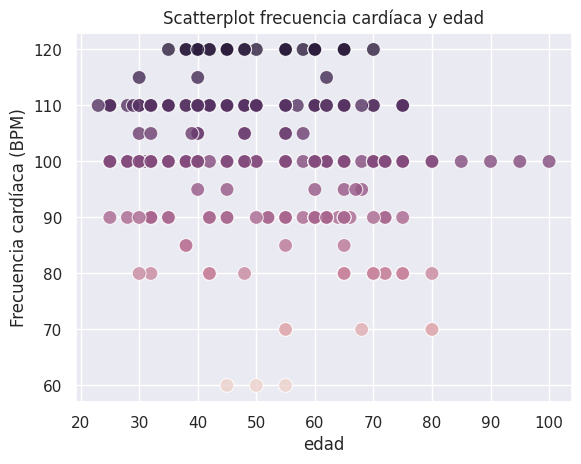

In [ ]:
sns.scatterplot(data=set_datos_original,
                y = 'frecuencia_cardiaca_bpm',
                x = 'edad',
                hue = 'frecuencia_cardiaca_bpm',
                legend=False,
                s = 100,
                alpha = 0.8);
plt.title("Scatterplot frecuencia cardíaca y edad")
plt.xlabel("edad")
plt.ylabel("Frecuencia cardíaca (BPM)")

El siguiente gráfico nos muestra los niveles de colesterol en función de la edad.

Text(0.5, 0, 'Edad')

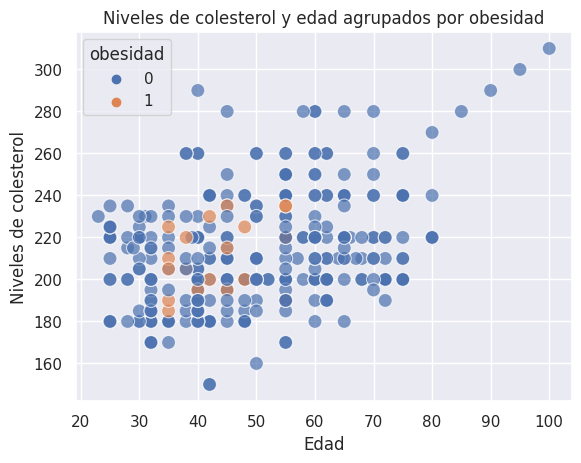

In [ ]:
sns.scatterplot(data = set_datos_original,
                y = 'niveles_de_colesterol',
                x = 'edad',
                #legend=False,
                s = 100,
                alpha = 0.7,
                hue='obesidad');

plt.title("Niveles de colesterol y edad agrupados por obesidad")
plt.ylabel("Niveles de colesterol")
plt.xlabel("Edad")

Text(0.5, 0, 'Edad')

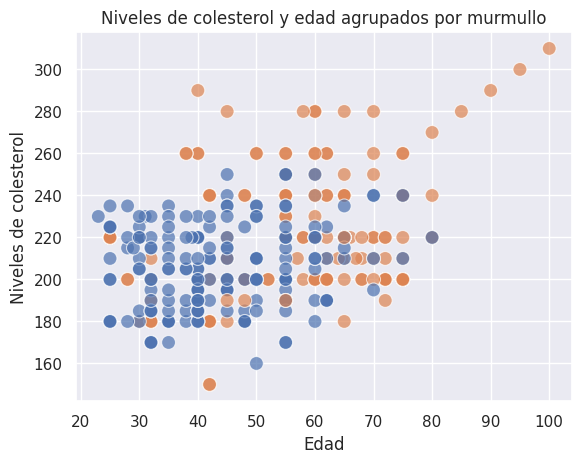

In [ ]:
sns.scatterplot(data = set_datos_original,
                y = 'niveles_de_colesterol',
                x = 'edad',
                legend=False,
                s = 100,
                alpha = 0.7,
                hue='murmullo');

plt.title("Niveles de colesterol y edad agrupados por murmullo")
plt.ylabel("Niveles de colesterol")
plt.xlabel("Edad")

Text(0, 0.5, 'Niveles de colesterol')

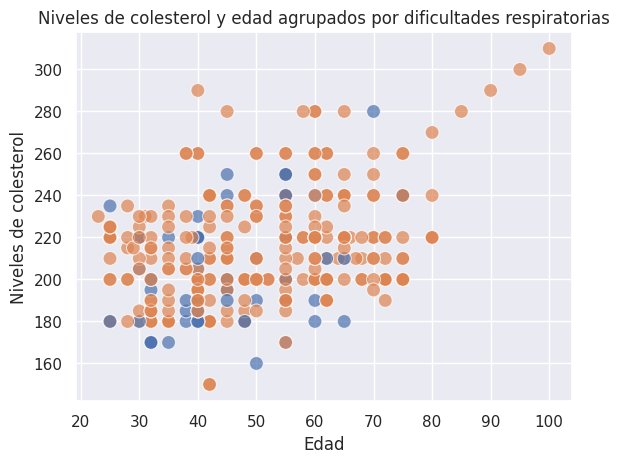

In [ ]:
sns.scatterplot(data = set_datos_original,
                y = 'niveles_de_colesterol',
                x = 'edad',
                legend=False,
                s = 100,
                alpha = 0.7,
                hue='dificultad_para_respirar');

plt.title("Niveles de colesterol y edad agrupados por dificultades respiratorias")
plt.xlabel("Edad")
plt.ylabel("Niveles de colesterol")

la siguiente función nos permitirá crear un dataframe, donde nos calcule por edad el porcentaje de alguna columna con valores booleanos, opcionalmente podremos dibujarlo.

In [ ]:
def porcentaje_en_funcion_de_edad(column : str = 'dolor_de_pecho', dibujar : bool = True) -> pd.DataFrame:
  df = set_datos_original[set_datos_original[column] == 1][[column, 'edad']].astype(int)
  df = df.groupby(by='edad').count()
  df[f'percent_{column}'] = df[column] * 100 / set_datos_original.shape[0]
  if dibujar:
    plt.figure(figsize=(12, 5));
    sns.barplot(data=df,
                x=df.index,
                y=f'percent_{column}');

  return df

Gráfico con personas que sufrieron dolores de pecho agrupados por edad.

Text(0, 0.5, 'Distribución')

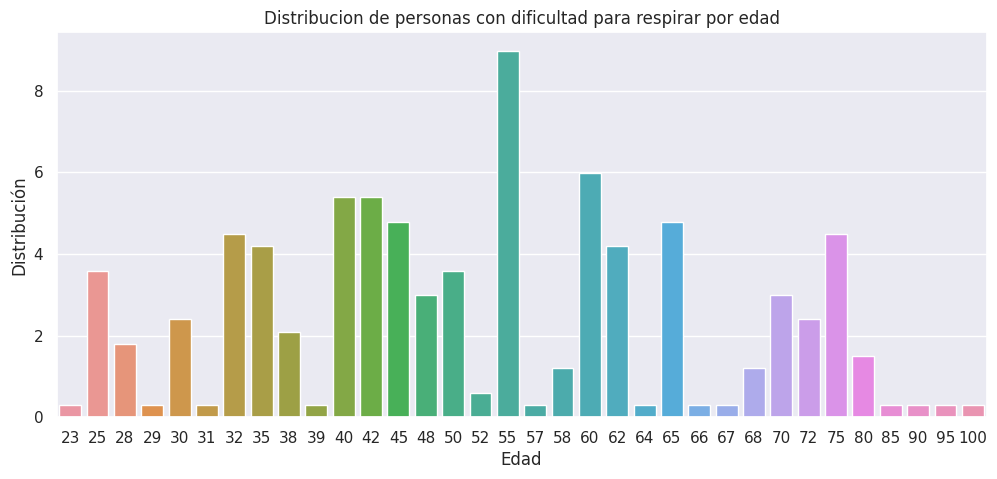

In [ ]:
porcentaje_en_funcion_de_edad('dificultad_para_respirar');

plt.title("Distribucion de personas con dificultad para respirar por edad")
plt.xlabel("Edad")
plt.ylabel("Distribución")

Gráfico que muestra los porcentajes de personas con dolores de pecho y dificultades para respirar agrupados por edad.
Este gráfico es interesante ya que a simple vista podemos ver que la mayoría de personas que sufren algún tipo de patología también suele sufrir la otra.

Text(0, 0.5, 'Porcentaje')

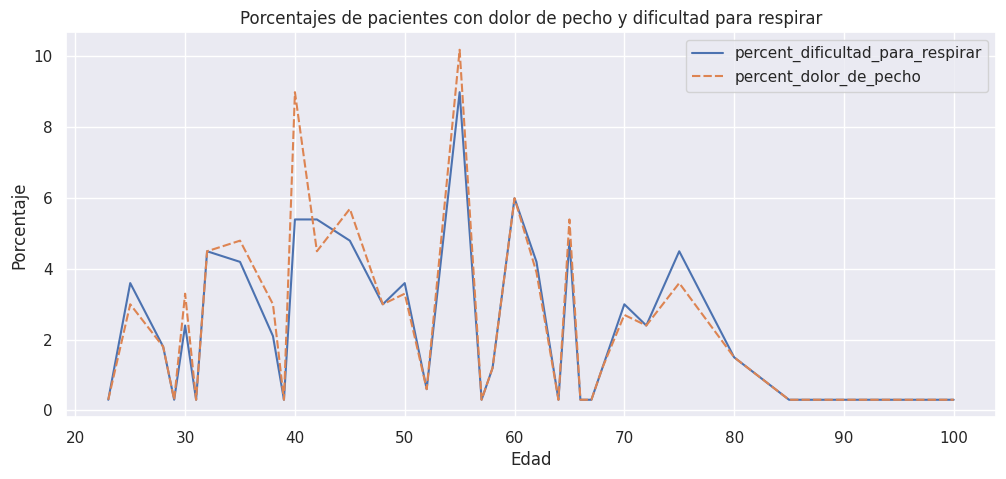

In [ ]:
df_0 = porcentaje_en_funcion_de_edad('dolor_de_pecho', False)
df_1 = porcentaje_en_funcion_de_edad('dificultad_para_respirar', False)
df_2 = df_0.join(df_1)

plt.figure(figsize=(12, 5));
sns.lineplot(data = df_2[['percent_dificultad_para_respirar', 'percent_dolor_de_pecho']]);


plt.title("Porcentajes de pacientes con dolor de pecho y dificultad para respirar")
plt.xlabel("Edad")
plt.ylabel("Porcentaje")

Correlación entre columnas

In [ ]:
def graficar_correlacion(data):
    # init figure size
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=False, fmt=".2f")

Text(44.046874999999986, 0.5, '')

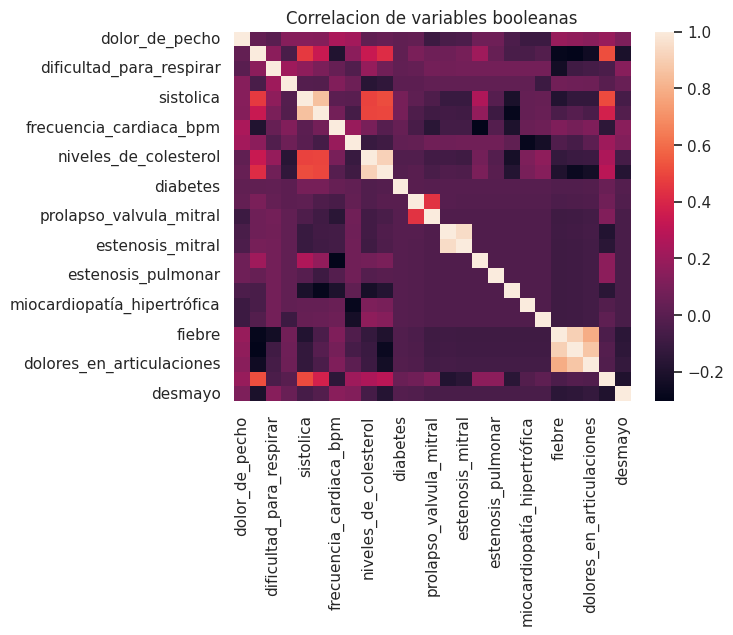

In [ ]:
columnas : list = ["dolor_de_pecho",
               "edad",
              "dificultad_para_respirar",
              "fatiga",
              "sistolica",
              "diastolica",
              "frecuencia_cardiaca_bpm",
              "sonidos_pulmonares",
              "niveles_de_colesterol",
              "colesterol_ldl",
              "diabetes",
              "fibrilacion_auricular",
              "prolapso_valvula_mitral",
              "fiebre_reumatica",
              "estenosis_mitral",
              "estenosis_aortica",
              "estenosis_pulmonar",
              "miocardiopatia_dilatada",
              "miocardiopatía_hipertrófica",
              "miocardiopatía_restrictiva",
              "fiebre",
              "escalofrios",
              "dolores_en_articulaciones",
              "hipertension",
              "desmayo"]
graficar_correlacion(set_datos_original[columnas])

plt.title("Correlacion de variables booleanas")
plt.xlabel("")
plt.ylabel("")

Como podemos ver el 93.8% de personas que tienen dificultad para respirar también sufren de dolores en el pecho.

In [ ]:
no_personas_con_p_respiratorios = set_datos_original[set_datos_original['dificultad_para_respirar'] == 1]['dificultad_para_respirar'].count()
no_personas_con_dolor_de_pecho = set_datos_original[set_datos_original['dolor_de_pecho'] == 1]['dolor_de_pecho'].count()
print(no_personas_con_p_respiratorios * 100 / no_personas_con_dolor_de_pecho)

93.87755102040816


Acá vemos que el 0.36% de las personas con dificultad para respirar también tinen diabetes.

In [ ]:
no_personas_con_p_respiratorios = set_datos_original[set_datos_original['dificultad_para_respirar'] == 1]['dificultad_para_respirar'].count()
no_personas_con_diabetes = set_datos_original[set_datos_original['diabetes'] == 1]['diabetes'].count()
print(no_personas_con_diabetes * 100 / no_personas_con_p_respiratorios)

0.36231884057971014


# **Preguntas Claves**
## **Pregunta 1**
¿Cuáles son los síntomas cardio-pulmonares más comunes en el conjunto de datos?
Como podemos ver los síntomas cardio-pulmonares más comunes son en orden:
1. Dolor de pecho.
2. Sonidos pulmonares.
3. Dificultad para respirar.
4. Colesterol alto.
5. Murmullo.

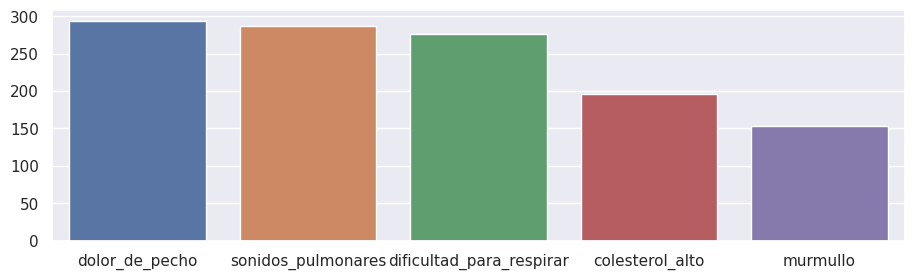

## Pregunta 2
¿Cuál es la distribución de la edad en la población del conjunto de datos?

Como podemos ver en el gráfico, la distrubución de edad está mayormente en personas de entre 40 y 55 años.

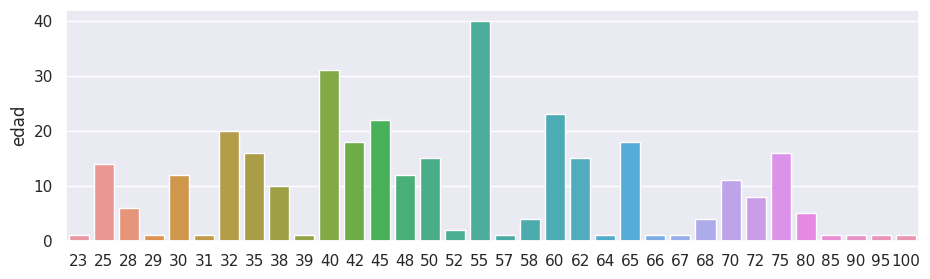

## Pregunta 3
¿Hay alguna relación entre la edad y la presencia de enfermedades cardio-pulmonares?

Como vemos existe una mínima variación entre las edades y las la condición de dolor de pecho, en el caso de esta enfermedad podemos decir que hay una relación constante entre esta enfermedad cardio-pulmonar y la edad.
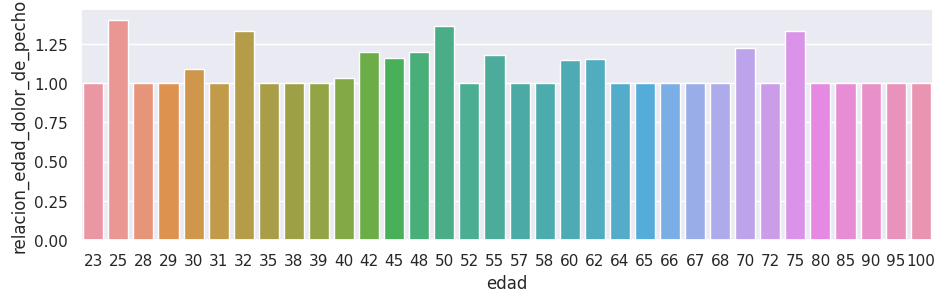

No sucede lo mismo con el prolapso de la válvula mitral, donde para personas de 55 el riesgo de sufrir esta condición es mucho más alta que para otras edades.

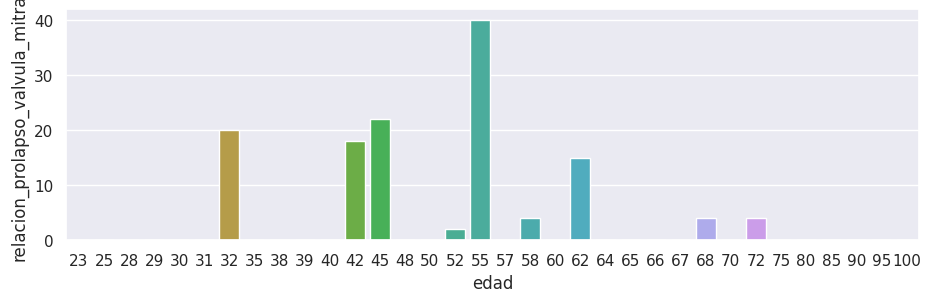

## Pregunta 4
¿Cuál es la relación entre la presión arterial y las enfermedades cardio-pulmonares?

Como vemos ninguna enfermedad tiene una fuerte correlación con la presión arterial sistolica, las enfermedades con mas alta correlación son el murmullo y el colesterol alto.

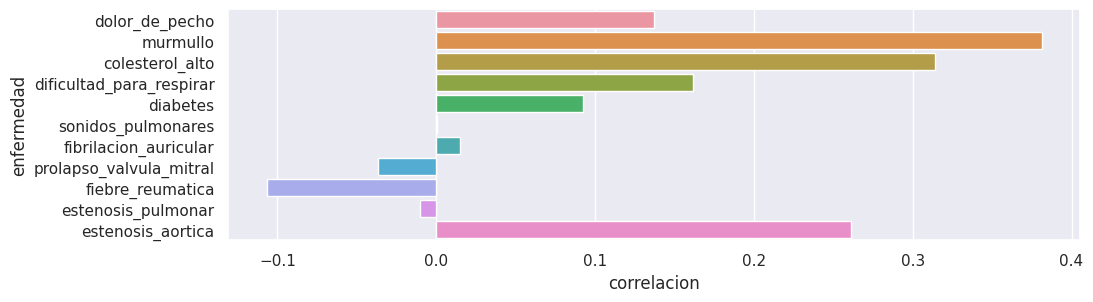

## Pregunta 5
¿Cuál es la relación entre los niveles de colesterol y las enfermedades cardio-pulmonares?

Como vemos en el gráfico tampoco existe gran correlación entre los niveles altos de colesterol y demás enfermedades cardio-pulmonares.
El **murmullo** es una enfermedad que tiene un poco de correlación positiva con el colesterol, y también la **dificultad para respirar** aunque bastante menos que el mumullo.
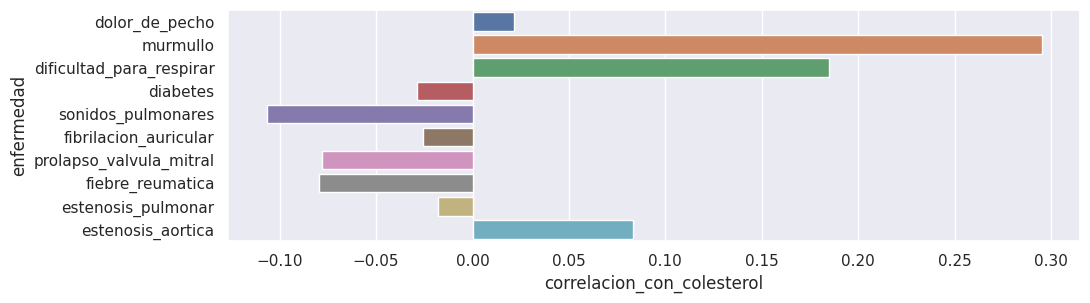

## **Insights**
---
* Las enfermedades más comunes son el dolor de pecho, sonidos pulmonares, dificultades para respirar, colesterol alto y murmullo.
* A mayor presión arterial la posibilidad de sufrir murmullos o colesterol alto aumentan.
* A mayor niveles de colesterol aumentan las posibilidades de sufrir dificultades para respirar o sufrir murmullos
* Los datos y su distribución hacen que sea más apropiado realizar un algoritmo de machine learning de clasificación y no uno de regresión.
* Los datos booleanos van a ser fundamentales para realizar esta tarea.




## **Recomendaciones**
---
* Si sos una persona con más de 75 años hacerse controles periódicos de colesterol, evitar a toda costa el colesterol alto.
* Tener una dieta saludable, ya que la obesidad puede generar mareos, fiebre y un aumento sustancial de los niveles de colesterol y la presión arterial.
* Ante síntomas de: Dolor de pecho, sonidos pulmonares, dificultad para respirar, murmullos, o colesterol alto, dirigirse inmediatamente al médico de confianza, ya que estos síntomas aumentan sustancialmente las posibilidades de sufrir algún padecimiento cardíaco.
* Independientemente de la edad, realizar chequeos periódicos de la presión arterial.


## **Conclusión**

En general, se observa una relación entre la edad y la presencia de enfermedades cardio-pulmonares, siendo el dolor de pecho una condición constante en todas las edades y el prolapso de la válvula mitral con mayor riesgo en personas de 55 años o más. Por otro lado, la presión arterial sistólica no parece tener una fuerte correlación con las enfermedades cardio-pulmonares, mientras que el colesterol alto tiene una correlación moderada con el murmullo y la dificultad para respirar. En conclusión, el conjunto de datos sugiere que la edad y el colesterol alto pueden ser factores importantes en el desarrollo de enfermedades cardio-pulmonares, mientras que la presión arterial sistólica puede no ser un indicador significativo.

# Detección de outliers
Buscaremos dentro de un DataFrame reducido outliers usando sklearn.

Usaremos un método de detección multivariable.

Sabemos que existe una distribusión gausiana de los datos.

In [ ]:
from sklearn.covariance import EllipticEnvelope

outliers = EllipticEnvelope(contamination=0.01, support_fraction=1)

set_datos_original_ = set_datos_original
set_datos_original_ = set_datos_original_.drop(['sexo',
                                  'ecocardiograma',
                                  'rayos_x_pecho',
                                  'enfermedades_previas',
                                  'funciones_pulmonares',
                                  'espirometria',
                                  'diagnostico',
                                  'medicaciones'], axis=1)
columnas = set_datos_original_.columns.values.tolist()

selection_arr = np.array(set_datos_original_[columnas].values)
outliers.fit(selection_arr);
selection_arr

array([[55,  1,  1, ...,  1,  0,  1],
       [57,  1,  1, ...,  1,  0,  1],
       [60,  1,  1, ...,  1,  0,  1],
       ...,
       [65,  1,  1, ...,  1,  0,  1],
       [68,  1,  1, ...,  1,  0,  1],
       [45,  1,  0, ...,  0,  0,  1]])

Predecimos y detectamos las posiciones de los outliers en forma multi-variable.

Posteriormente limpiamos el dataset.

In [ ]:
pred = outliers.predict(selection_arr)
pred

pos_outliers = np.where(pred == -1)
pos_outliers = pos_outliers[0].tolist()
pos_outliers

[237, 238, 288, 293]

In [ ]:
try:
  set_datos_original = set_datos_original.drop(pos_outliers, axis=0)
except:
  pass
print(f'se limparon {len(pos_outliers)} outliers del el conjunto de datos.')

se limparon 4 outliers del el conjunto de datos.


la correlación entre las columnas es la siguiente.

# Feature selection por forward selection.

In [ ]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    caracteristicas_iniciales = data.columns.tolist()
    mejores_caracteristicas = []
    while (len(caracteristicas_iniciales)>0):
        caracteristicas_restantes = list((set(caracteristicas_iniciales)-set(mejores_caracteristicas)))
        nuevo_valor_p = pd.Series(index=caracteristicas_restantes, dtype=np.float64)
        for nueva_columna in caracteristicas_restantes:
            modelo = sm.OLS(target, sm.add_constant(data[mejores_caracteristicas+[nueva_columna]])).fit()
            nuevo_valor_p[nueva_columna] = modelo.pvalues[nueva_columna]
        min_p_value = nuevo_valor_p.min()
        if(min_p_value<significance_level):
            mejores_caracteristicas.append(nuevo_valor_p.idxmin())
        else:
            break
    return mejores_caracteristicas

In [ ]:
Y =  set_datos_original_['niveles_de_colesterol']
columnas_seleccionadas = forward_selection(set_datos_original_,Y, 0.05)
columnas_seleccionadas.append('edad')
print("Las columnas seleccionadas son:")
for i in columnas_seleccionadas:
  print(f"\t-{i}")

Las columnas seleccionadas son:
	-niveles_de_colesterol
	-dolor_de_pecho
	-murmullo
	-colesterol_hdl
	-fiebre
	-colesterol_alto
	-dificultad_para_respirar
	-edad


In [ ]:
columnas_seleccionadas.append('frecuencia_cardiaca_bpm')
set_datos_original_ = set_datos_original[columnas_seleccionadas]

# Feature selection con Random Forest Classifier

---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [ ]:
variables_ : pd.DataFrame = set_datos_original

variables_ = variables_[columnas]
y_seleccionada : str = 'sistolica'

X = variables_.drop(y_seleccionada, axis=1)
y = variables_[y_seleccionada]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = RandomForestClassifier(random_state=42)

selector = SelectFromModel(modelo)

X_new = selector.fit_transform(X, y)

caracteristicas_Seleccionadas = selector.get_support(indices=True)
cols = []

for idx in caracteristicas_Seleccionadas:
    feature = columnas[idx]
    cols.append(feature)
    print(feature)


edad
sistolica
diastolica
sonidos_pulmonares
niveles_de_colesterol
colesterol_ldl
alcoholismo
mareo


# Modelos

Preparo los datos de entrenamiento de de testing

In [ ]:
datos_procesados : pd.DataFrame = set_datos_original[cols]
x = datos_procesados.drop('sistolica', axis=1)
y = datos_procesados['sistolica']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **Random forest classifier**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

In [ ]:
parametros : dict = {
    'n_estimators': [50, 100, 200],    # Número de árboles en el bosque
    'max_depth': [None, 5, 10],         # Profundidad máxima de los árboles
    'min_samples_split': [2, 4, 8]      # Número mínimo de muestras requeridas para dividir un nodo
}

In [ ]:
rf = RandomForestClassifier()

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=parametros, cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [50, 100, 200]})

In [ ]:
print('Precisión del random forest')
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Puntuación del mejor modelo:")
print(grid_search.best_score_)

Precisión del random forest
Mejores hiperparámetros encontrados:
{'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 200}
Puntuación del mejor modelo:
0.7121190130624092


## **Support Vector Machine**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
params : dict = {'C': [1, 10, 100],
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['linear']}

In [ ]:
svm = SVC()
clf = GridSearchCV(svm, params, cv=2)
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['linear']})

In [ ]:
# Mejores paramms
mejor_modelo = clf.best_estimator_

# Hacemos preds.
y_pred = mejor_modelo.predict(X_test)

In [ ]:
print("Métricas SVM")
print("Mejores hiperparámetros:", clf.best_params_)
print("Precisión:", metrics.accuracy_score(y_test, y_pred))

Métricas SVM
Mejores hiperparámetros: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Precisión: 0.7424242424242424


## **Naive Bayes**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:
clf = MultinomialNB()
clf.fit(X_train, y_train);

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print('Metricas de Naive Bayes')
print("Precisión:", metrics.accuracy_score(y_test, y_pred))

Metricas de Naive Bayes
Precisión: 0.3939393939393939


# Selección de modelo

Claramente elijo el modelo de clasificación usando Support Vector Machine ya que tuve una presición de **0.74**